# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


In [4]:
df.head(5)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 59 columns):
lat                      6376 non-null float64
lon                      6376 non-null float64
price_aprox_usd          6376 non-null float64
surface_total_in_m2      6376 non-null float64
surface_covered_in_m2    6376 non-null float64
rooms                    6376 non-null int64
barrio_match             6376 non-null int64
PH                       6376 non-null int64
apartment                6376 non-null int64
house                    6376 non-null int64
AGRONOMIA                6376 non-null int64
ALMAGRO                  6376 non-null int64
BALVANERA                6376 non-null int64
BARRACAS                 6376 non-null int64
BELGRANO                 6376 non-null int64
BOCA                     6376 non-null int64
BOEDO                    6376 non-null int64
CABALLITO                6376 non-null int64
CHACARITA                6376 non-null int64
COGHLAN                  637

In [6]:
df.outlier_price_m2.unique()

array([0], dtype=int64)

El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [7]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2,random_state=42)


## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [8]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion= 'mse',max_depth= 10,random_state=42)

In [9]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [10]:
y_pred = reg_tree.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [11]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

21662.874855363592

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [12]:
max_depth =np.arange(5,31,5)
max_depth

array([ 5, 10, 15, 20, 25, 30])

In [13]:
rmses_train= np.array([])
rmses_test= np.array([])

In [14]:

for m in max_depth:
    reg_tree = DecisionTreeRegressor(criterion= 'mse',max_depth= m,random_state=42)
    reg_tree.fit(X_train, y_train)
    y_pred_test = reg_tree.predict(X_test)
    y_pred_train = reg_tree.predict(X_train)
    rmses_train=np.append(rmses_train,np.sqrt(mean_squared_error(y_pred_train,y_train)))
    rmses_test=np.append(rmses_test,np.sqrt(mean_squared_error(y_pred_test,y_test)))    
    

In [15]:
rmses_train

array([21170.40334493, 15507.09190668,  7915.29642886,  2468.99760832,
         675.95526641,   526.33397195])

In [16]:
rmses_test

array([22247.8034523 , 21662.87485536, 24353.69304357, 25235.75970171,
       24858.05632118, 25192.15785238])

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

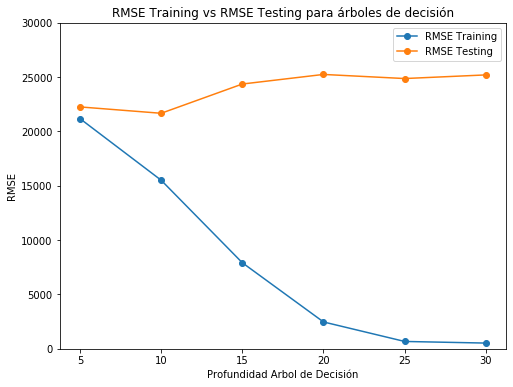

In [17]:
import matplotlib.pyplot as plt
#%matplotlib inline 
plt.rcParams['figure.figsize'] = (8,6)
plt.plot(range(5,31, 5), rmses_train,'-,',marker = 'o', label='RMSE Training')
plt.plot(range(5,31, 5), rmses_test,'-,',marker = 'o', label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.ylabel('RMSE')
plt.xlabel('Profundidad Arbol de Decisión')
plt.show()


Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [18]:
print('Maximos: \n',pd.DataFrame(X_train).max(),'\n \n Mínimas: \n',pd.DataFrame(X_train).min(),'\n')
print('Means: \n',pd.DataFrame(X_train).mean(),'\n \n Std: \n',pd.DataFrame(X_train).std())

Maximos: 
 lat                        -34.536
lon                        -58.353
surface_total_in_m2     120000.000
surface_covered_in_m2   120000.000
rooms                        7.000
barrio_match                 1.000
PH                           1.000
apartment                    1.000
house                        1.000
AGRONOMIA                    1.000
ALMAGRO                      1.000
BALVANERA                    1.000
BARRACAS                     1.000
BELGRANO                     1.000
BOCA                         1.000
BOEDO                        1.000
CABALLITO                    1.000
CHACARITA                    1.000
COGHLAN                      1.000
COLEGIALES                   1.000
CONSTITUCION                 1.000
FLORES                       1.000
FLORESTA                     1.000
LINIERS                      1.000
MATADEROS                    1.000
MONSERRAT                    1.000
MONTE CASTRO                 1.000
NUEVA POMPEYA                1.000
NUEZ     

Lo ideal sería eliminar los outliers que aparecen. Hay propiedades con superficies nulas y otras con superficies muy grandes 120000m2 (12 hectareas!)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [20]:
print('Maximos: \n',pd.DataFrame(X_train).max(),'\n \n Mínimas: \n',pd.DataFrame(X_train).min(),'\n')
print('Means: \n',pd.DataFrame(X_train).mean(),'\n \n Std: \n',pd.DataFrame(X_train).std())

Maximos: 
 0     2.729
1     2.060
2    71.232
3    71.262
4     4.996
5     0.676
6     3.026
7     0.372
8     6.498
9    16.353
10    3.965
11    3.254
12    8.801
13    4.550
14    7.921
15    8.185
16    4.157
17    9.667
18   10.720
19    7.872
20    6.470
21    4.088
22    7.504
23    7.775
24    8.733
25    6.042
26    8.801
27   11.392
28    8.241
29    3.369
30   10.259
31    8.602
32   12.030
33    9.667
34   10.974
35   50.488
36    4.341
37    6.965
38    7.591
39    6.799
40    4.699
41    8.733
42    9.324
43   13.707
44    4.767
45    7.872
46    7.775
47    8.733
48   10.482
49    9.165
50   10.259
51    9.243
52   16.803
53   26.974
54   11.392
55   41.219
56    5.745
57    0.000
dtype: float64 
 
 Mínimas: 
 0    -3.498
1    -2.226
2    -0.051
3    -0.045
4    -1.414
5    -1.480
6    -0.330
7    -2.688
8    -0.154
9    -0.061
10   -0.252
11   -0.307
12   -0.114
13   -0.220
14   -0.126
15   -0.122
16   -0.241
17   -0.103
18   -0.093
19   -0.127
20   -0.155
21   -0.245

In [21]:
from sklearn.neighbors import KNeighborsRegressor

reg_knn = KNeighborsRegressor(n_neighbors=10 )
reg_knn.fit(X_train,y_train)

y_train_pred = reg_knn.predict(X_train)
y_test_pred = reg_knn.predict(X_test)


In [22]:
knn_rmses_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
knn_rmses_test

28041.00013460877

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [23]:
n_neighbors =np.arange(1,30,1)
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [24]:
rmses_train= np.array([])
rmses_test= np.array([])

In [25]:
rmses_test

array([], dtype=float64)

In [26]:
for k in n_neighbors:
    
    reg_knn = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    reg_knn.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = reg_knn.predict(X_train)
    rmses_train=np.append(rmses_train,np.sqrt(mean_squared_error(y_train,y_train_pred)))
    
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = reg_knn.predict(X_test)
    rmses_test=np.append(rmses_test,np.sqrt(mean_squared_error(y_test,y_test_pred)))

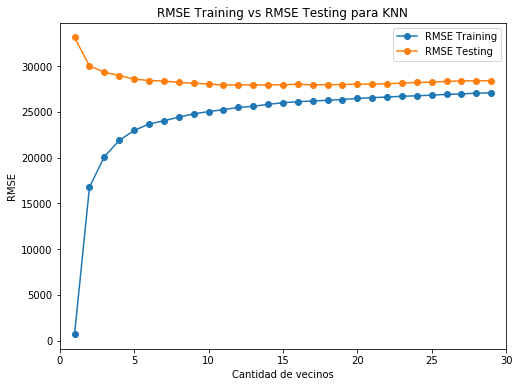

In [27]:
plt.rcParams['figure.figsize'] = (8,6)
plt.plot(range(1,30, 1), rmses_train,'-,',marker = 'o', label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test,'-,',marker = 'o', label='RMSE Testing')
plt.xlim((0, 30))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.ylabel('RMSE')
plt.xlabel('Cantidad de vecinos')
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usa la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [28]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2,random_state=42)


In [29]:
regressor = DecisionTreeRegressor(criterion='mse' ,max_depth = 5,random_state=42)

In [30]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [31]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

In [32]:
score

array([-4.55379022e+08, -4.47550255e+08, -5.15974353e+08, -4.65436915e+08,
       -5.11563221e+08, -5.34552234e+08, -4.71181433e+08, -4.81852513e+08,
       -4.49061048e+08, -4.99971258e+08])

In [33]:
rmse = nmsq2rmse(score)

In [34]:
rmse

array([21339.61156931, 21155.38358516, 22715.06886388, 21573.98699767,
       22617.76339868, 23120.38568626, 21706.71400993, 21951.1392186 ,
       21191.06057582, 22360.03707658])

In [35]:
RMSE_prom = rmse.mean()

In [36]:
RMSE_prom

21973.11509818715

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia 

In [37]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [38]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)'),(abs(val_real-val_pred)/val_real*100).rename('error_porcentual')] ,  axis=1)

In [39]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-),error_porcentual
0,80000.000,108426.872,28426.872,35.534
1,128000.000,151372.531,23372.531,18.260
2,150000.000,151372.531,1372.531,0.915
3,85000.000,99219.122,14219.122,16.728
4,135000.000,130337.039,4662.961,3.454
5,135000.000,119967.914,15032.086,11.135
6,68000.000,87243.666,19243.666,28.300
7,110000.000,128379.238,18379.238,16.708
8,134000.000,154167.172,20167.172,15.050
9,110000.000,85248.777,24751.223,22.501


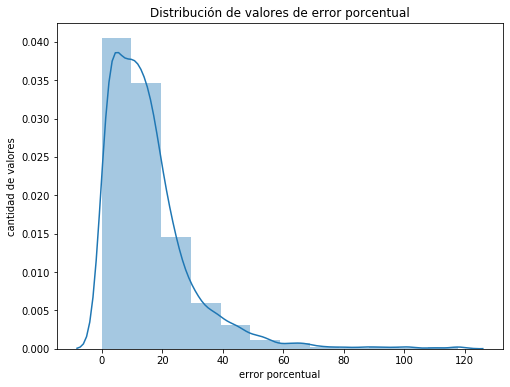

In [40]:
sns.distplot(predicciones['error_porcentual'],bins = 12)


plt.title("Distribución de valores de error porcentual")
plt.ylabel('cantidad de valores')
plt.xlabel('error porcentual')
plt.show()